In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
def get_data(system, rep):
    ava_data = open('ORDER_PER_BOND/{0:s}_v{1:d}_nowat_cut20_Averaged_order-parameter.txt'.format(system, rep), 'r')
    d = ava_data.readlines()
    bonds = np.array(d[1].split())
    for idx, line in enumerate(d):
        if re.match('Average order parameter for Edge', line):
            edge = d[idx+1]
        elif re.match('Average order parameter for Cent', line):
            cent = d[idx+1]
    E = np.array(edge.split())
    C = np.array(cent.split())
    n_beads = C.shape[0]
    return [ float(i) for i in E ], [ float(i) for i in C ], n_beads, bonds

In [3]:
def plot_order (system):
    Data_E = []
    Data_C = []
    for r in range(1,4):
        E, C, n_beads, bonds = get_data(system, r)
        Data_E.append(E)
        Data_C.append(C)

    D_E = np.array(Data_E)
    D_C = np.array(Data_C)
    mean_C = np.mean(D_C, axis=0)
    std_C = np.std(D_C, axis=0)
    mean_E = np.mean(D_E, axis=0)
    std_E = np.std(D_E, axis=0)
    
    plt.figure(figsize=(20,10))
    plt.plot(range(n_beads), mean_C, label='Center', color='blue')
    plt.errorbar(range(n_beads), mean_C, yerr=std_C, color='blue')
    plt.plot(range(n_beads), mean_E, label='Edge', color='red')
    plt.errorbar(range(n_beads), mean_E, yerr=std_E, color='red', fmt='-')
    plt.xticks(range(n_beads), bonds, fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.legend(loc='upper right', frameon=False, fontsize=15)
    plt.xlabel('Bonds in POPC', fontsize=15)
    plt.ylabel('P2 Order parameter', fontsize=15)
    name='{0:s} #{1:s} POPC/leaflet'.format(system.split('_')[0], system.split('_')[1])
    plt.title(name, fontsize=15)
    plt.tight_layout()
    plt.ylim(-0.3,0.6)
    plt.savefig('ORDER_PER_BOND/'+system+'_order_edge_cent_tail.png', dpi=600)
    plt.show()
    return

In [4]:
def plot_order2 (system):
    Data_E = []
    Data_C = []
    for r in range(1,4):
        E, C, n_beads, bonds = get_data(system, r)
        Data_E.append(E)
        Data_C.append(C)

    D_E = np.array(Data_E)[:,3:]
    D_C = np.array(Data_C)[:,3:]
    mean_C = np.mean(D_C)
    std_C = np.std(D_C)
    mean_E = np.mean(D_E)
    std_E = np.std(D_E)
    
    n_beads = n_beads -3
    bonds = bonds[3:]
    
    
    plt.figure(figsize=(20,10))
    plt.plot(mean_C, label='Center', color='blue')
    #plt.errorbar(1, mean_C, yerr=std_C, color='blue')
    plt.plot(mean_E, label='Edge', color='red')
    #plt.errorbar(1, mean_E, yerr=std_E, color='red', fmt='-')
    #plt.xticks(range(n_beads), bonds, fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.legend(loc='upper right', frameon=False, fontsize=15)
    plt.xlabel('Bonds in POPC', fontsize=15)
    plt.ylabel('P2 Order parameter', fontsize=15)
    name='{0:s} #{1:s} POPC/leaflet'.format(system.split('_')[0], system.split('_')[1])
    plt.title(name, fontsize=15)
    plt.tight_layout()
    plt.ylim(-0.3,0.6)
    plt.savefig('ORDER_PER_BOND/'+system+'_TEST_order_edge_cent_tail.png', dpi=600)
    plt.show()
    return

In [5]:
systems= ['1D1_60', '1D1_70', '1D1_75', '1D1_80',  'NW11_70', 'NW11_80', 'NW11_90']

M_E = []
M_C = []
S_E = []
S_C = []

for system in systems:
    Data_E = []
    Data_C = []
    for r in range(1,4):
        E, C, n_beads, bonds = get_data(system, r)
        Data_E.append(E)
        Data_C.append(C)
    M_C.append(np.mean(Data_C))
    M_E.append(np.mean(Data_E))
    S_C.append(np.std(Data_C))
    S_E.append(np.std(Data_E))

IOError: [Errno 2] No such file or directory: 'ORDER_PER_BOND/1D1_60_v1_nowat_cut20_Averaged_order-parameter.txt'

In [58]:
len(M_C)

7

In [59]:
len(systems)

7

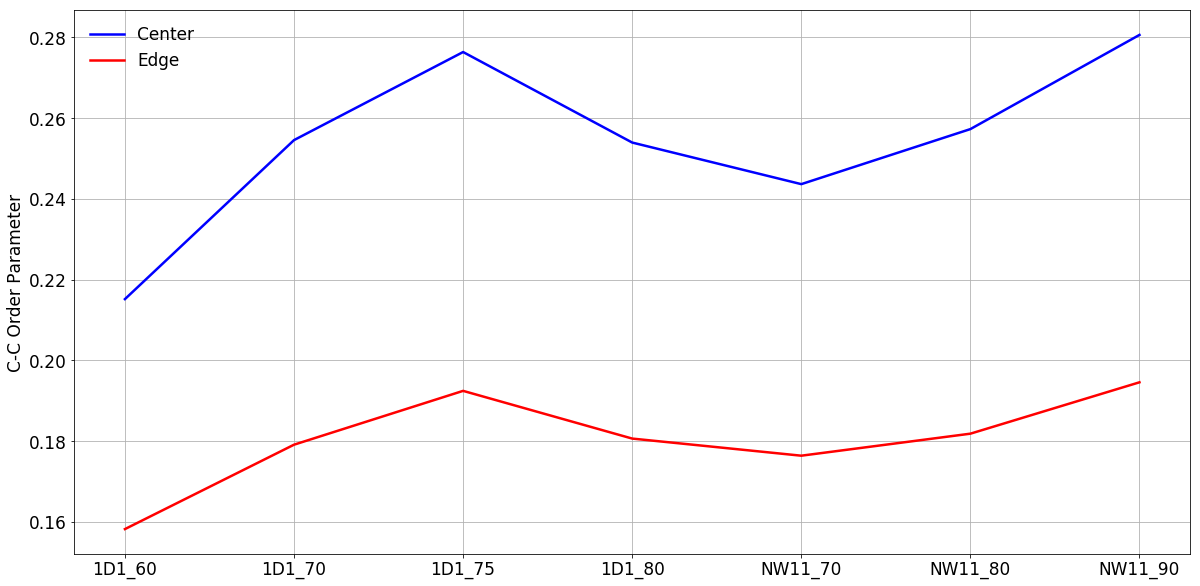

In [14]:
plt.figure(figsize=(20,10))
plt.plot(M_C, label='Center', color='blue', linewidth=2.5)
#plt.errorbar(range(len(systems)), M_C, yerr=S_C, color='blue')
plt.plot(M_E, label='Edge', color='red',  linewidth=2.5)
#plt.errorbar(range(len(systems)), M_E, yerr=S_E, color='red')
plt.xticks(range(len(systems)), systems, fontsize=17)
plt.yticks(fontsize=17)
plt.grid(True)
plt.legend(loc='best', frameon=False, fontsize=17)
plt.ylabel('C-C Order Parameter', fontsize=17)
plt.savefig('Average_order_parameter_cent_edge.png', dpi=600)

In [19]:
bonds[3:]

array(['GL1-C1A', 'GL2-C1B', 'C1A-D2A', 'D2A-C3A', 'C3A-C4A', 'C1B-C2B',
       'C2B-C3B', 'C3B-C4B'], dtype='|S7')

In [16]:
np.array(Data_C)[:,3:].shape

(3, 8)

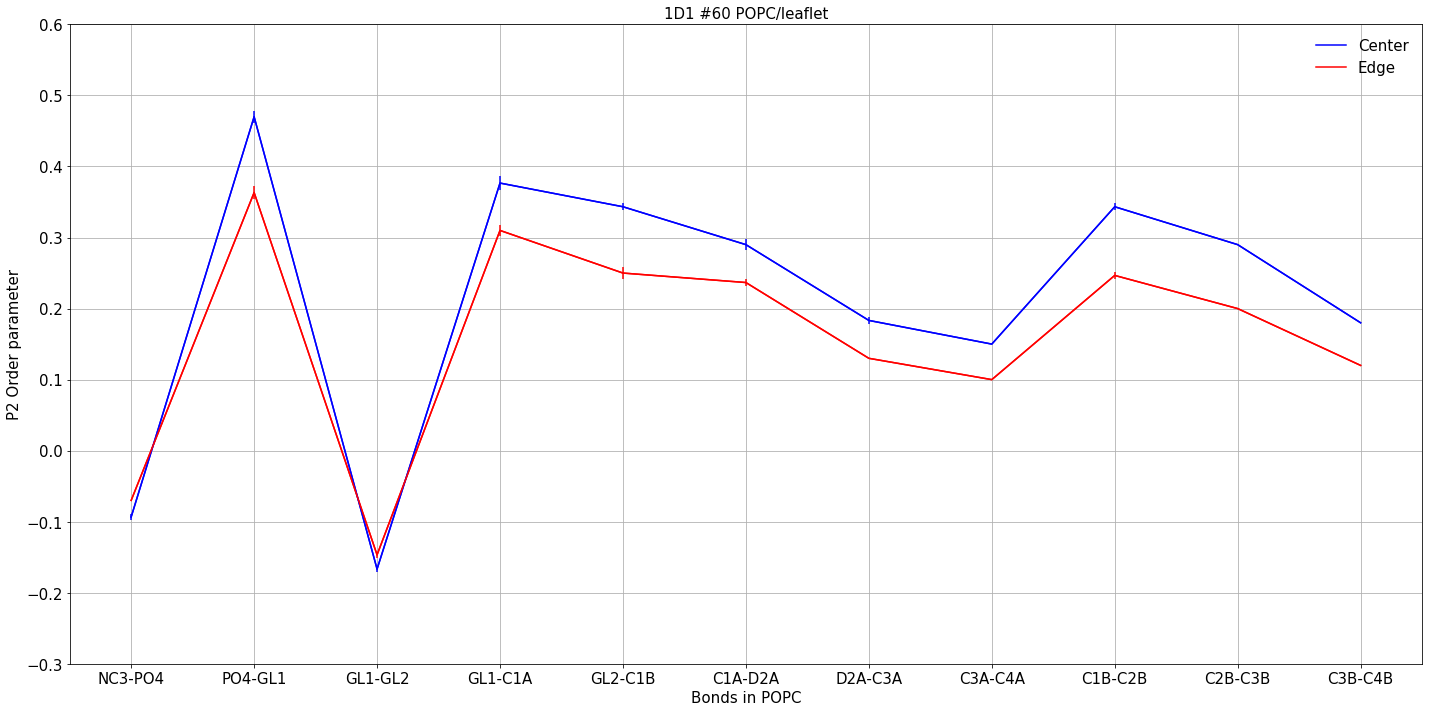

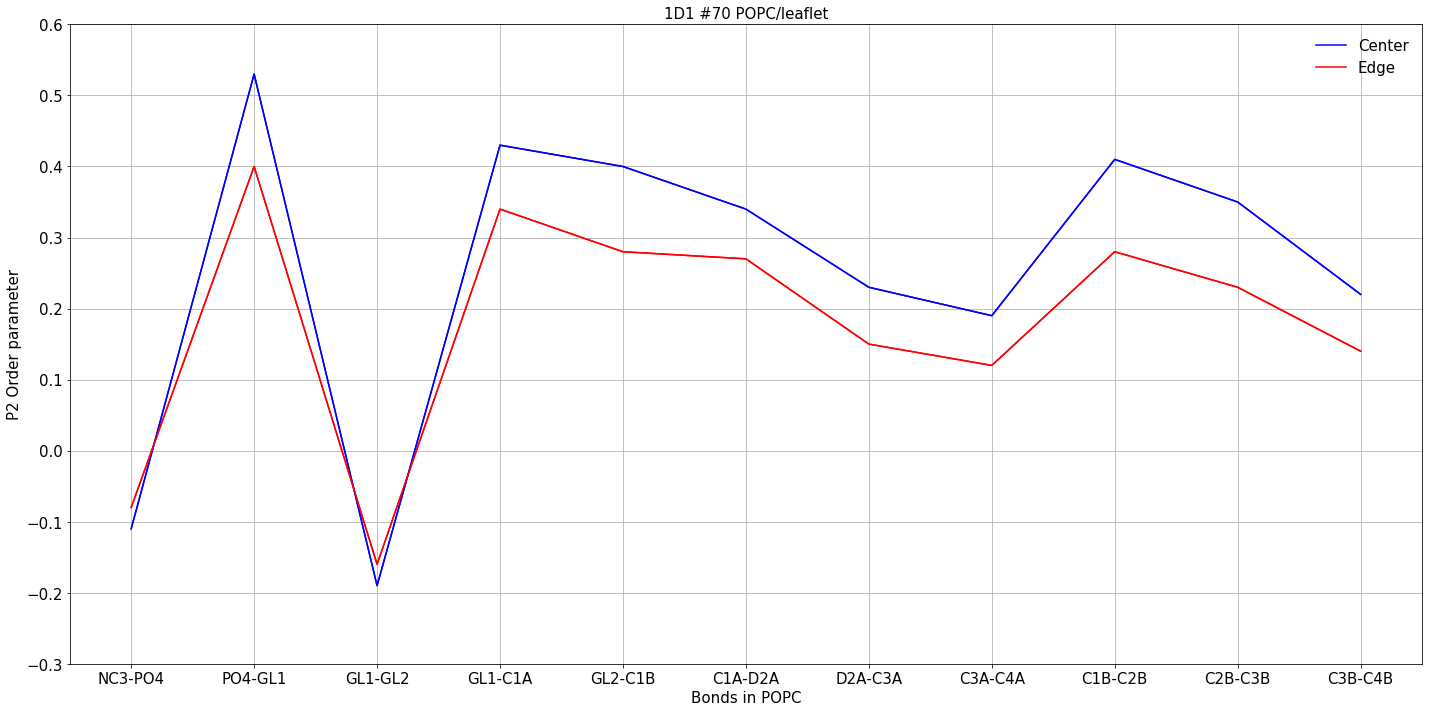

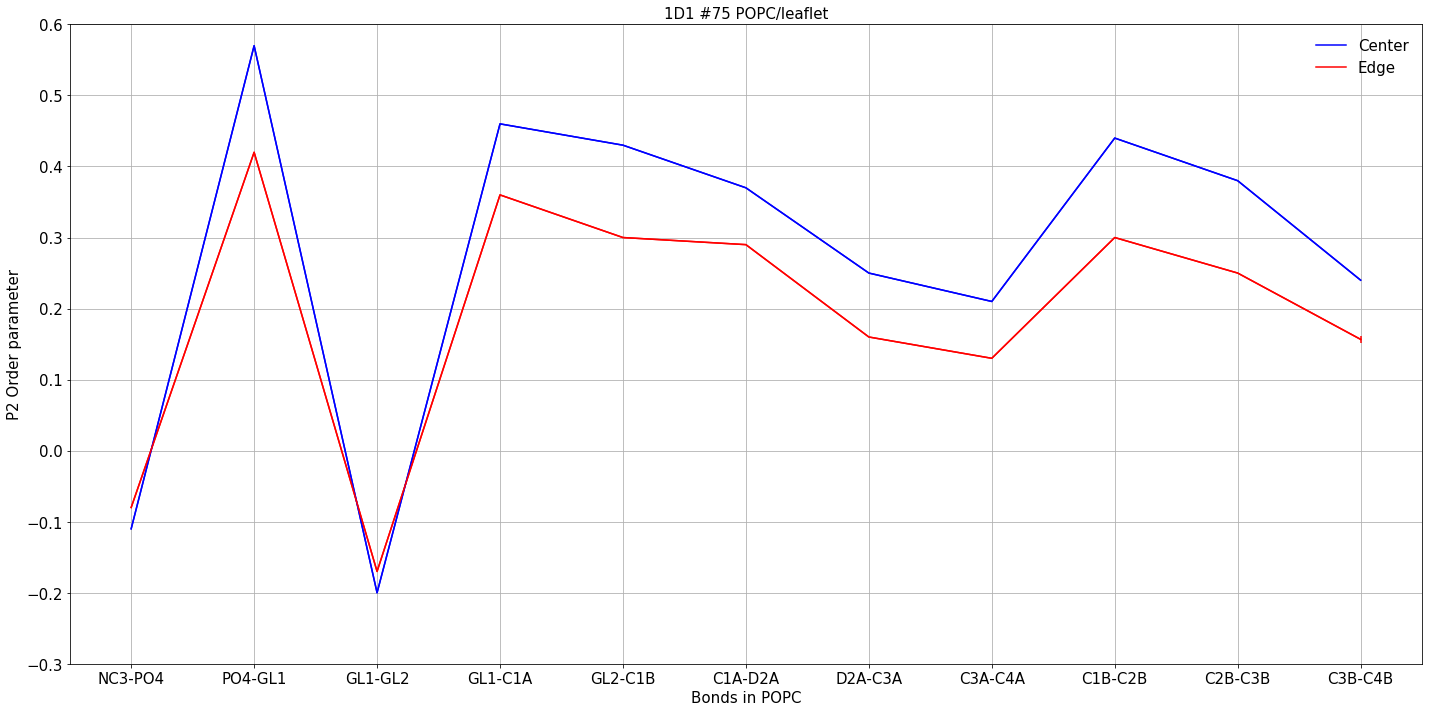

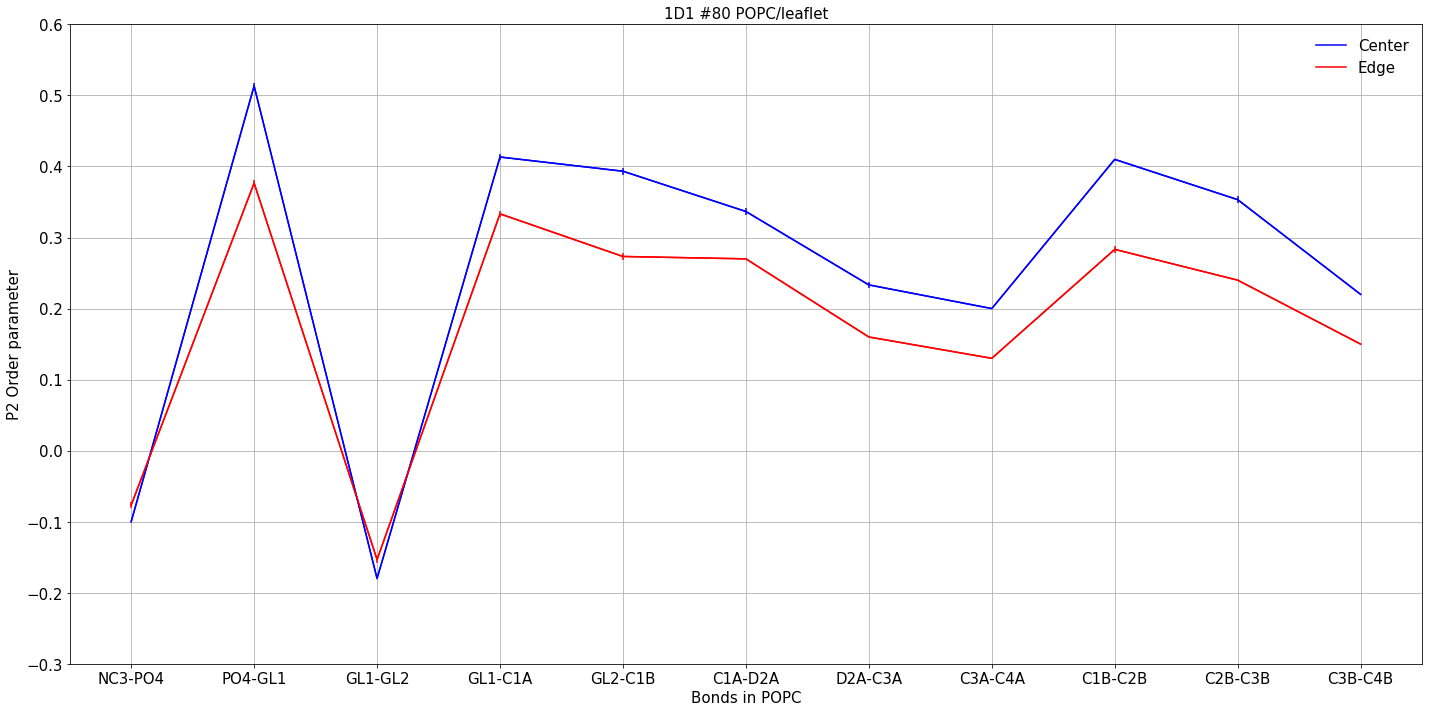

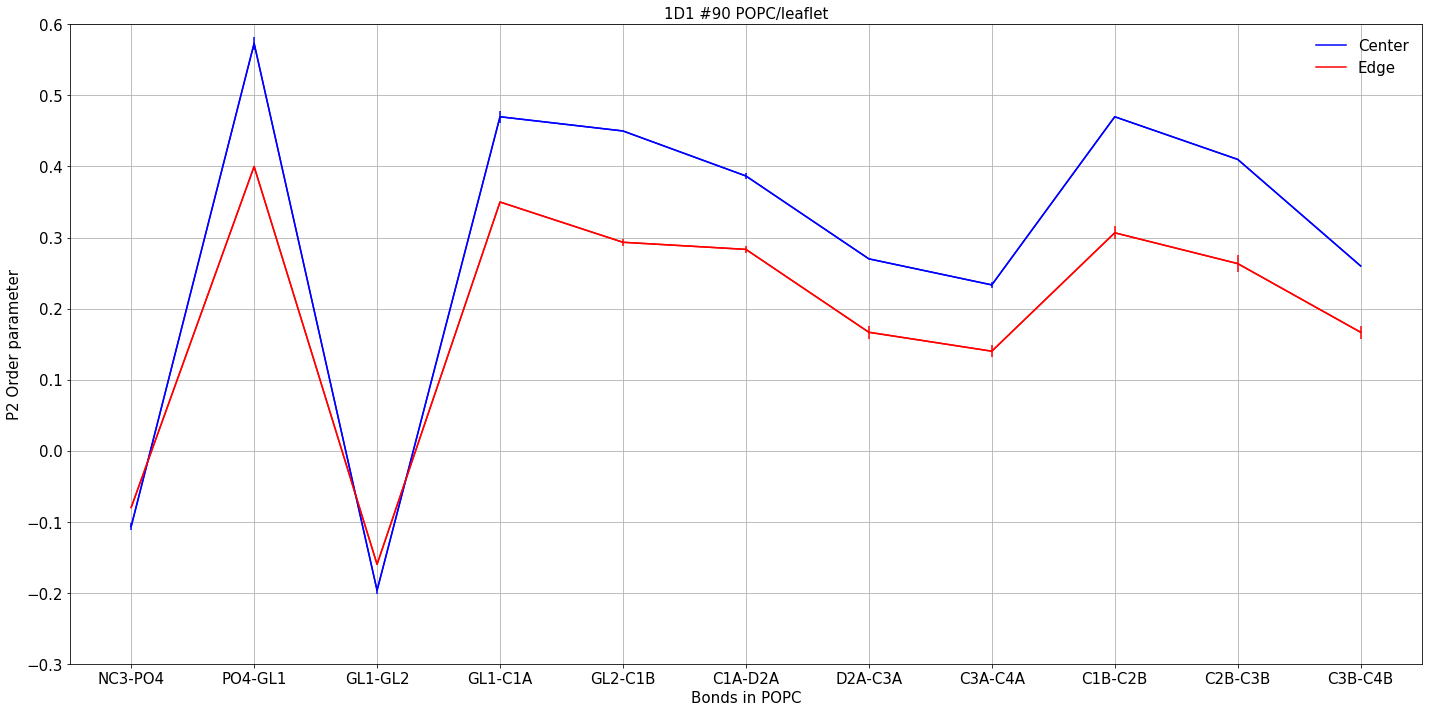

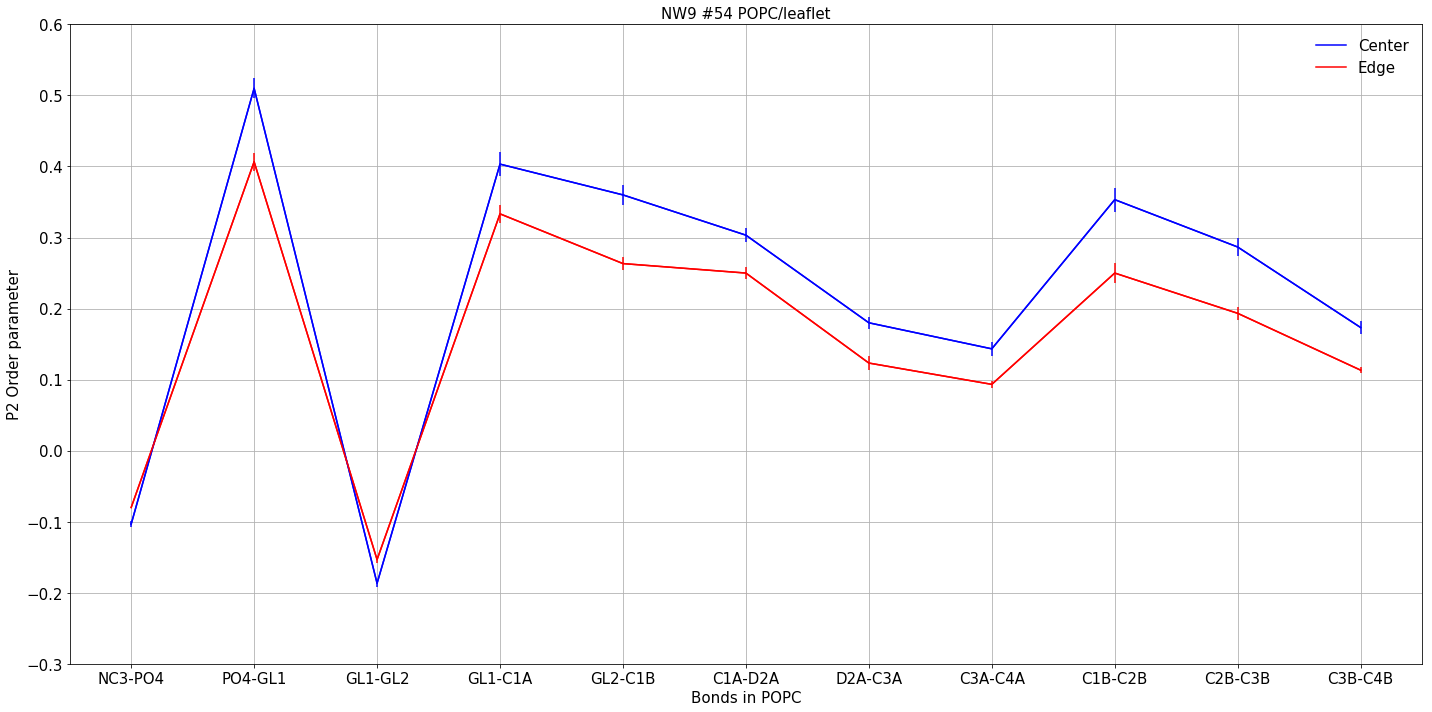

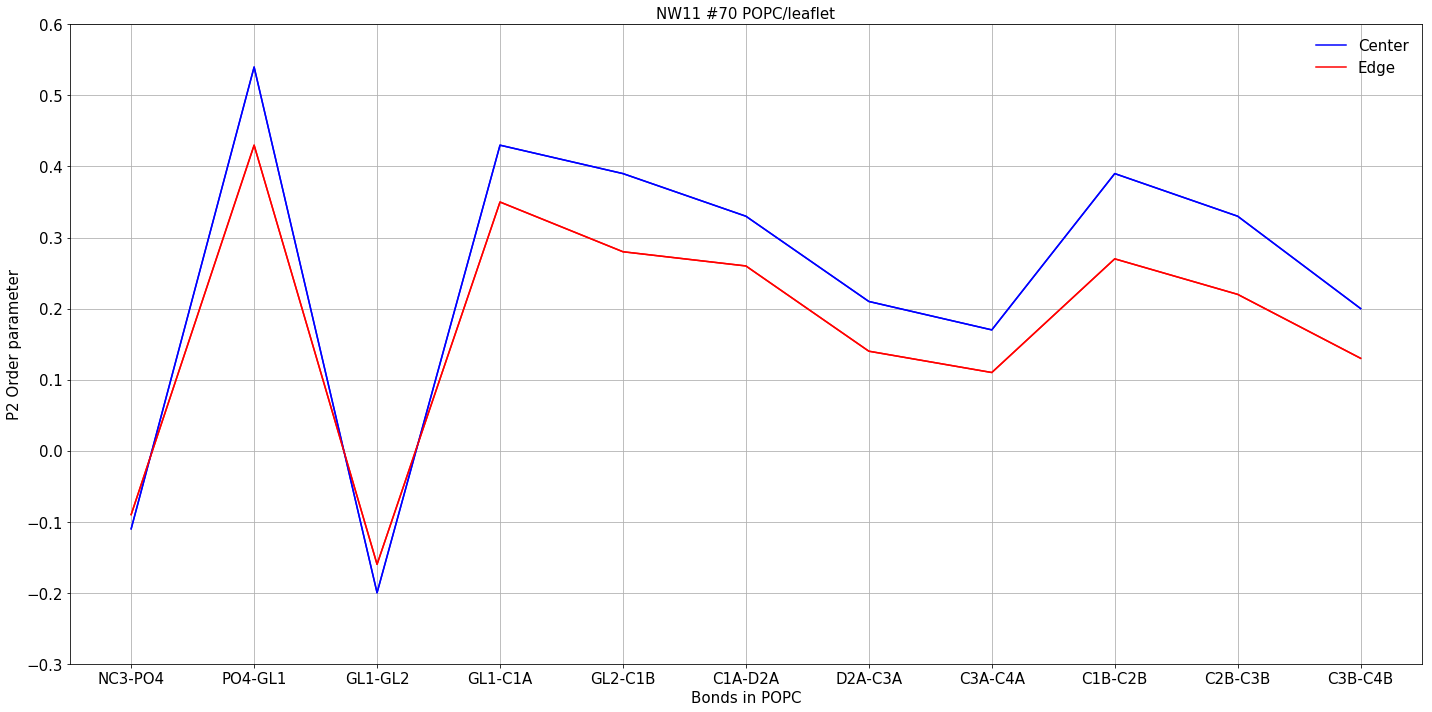

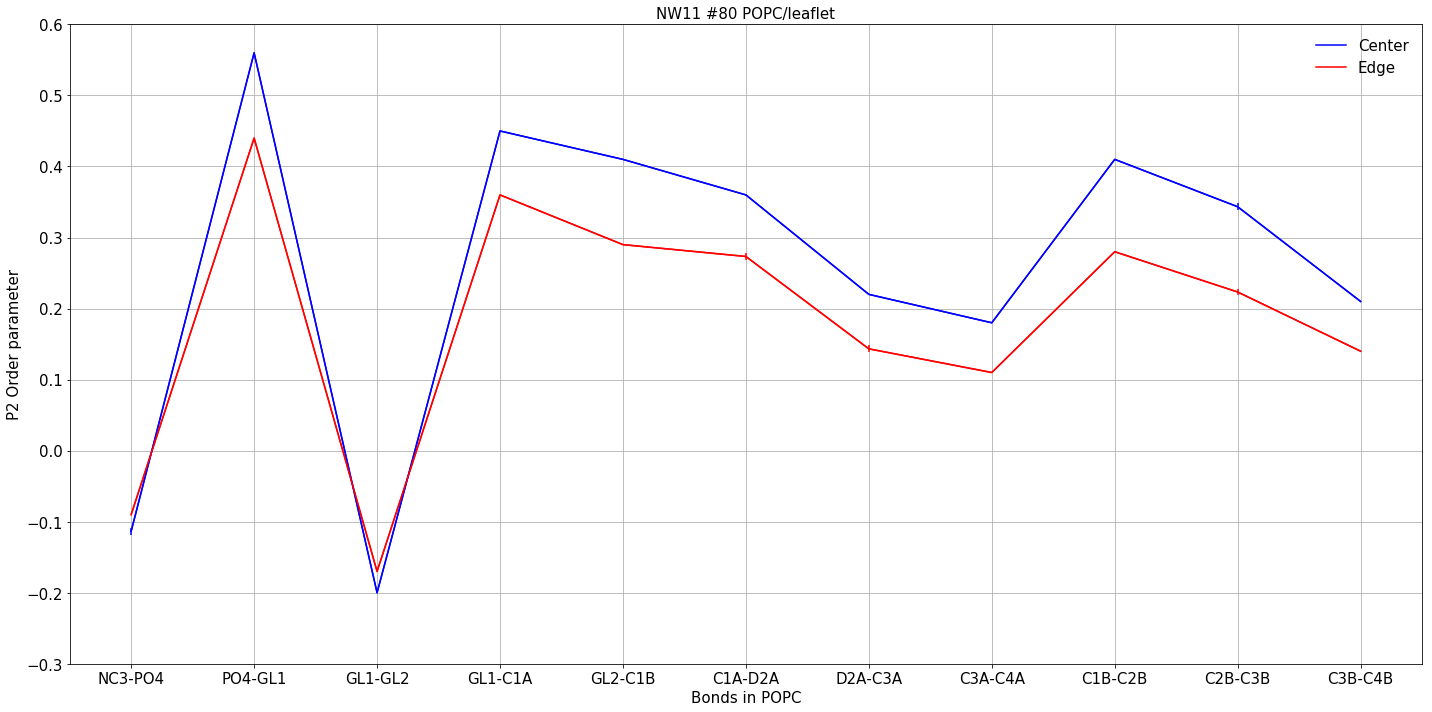

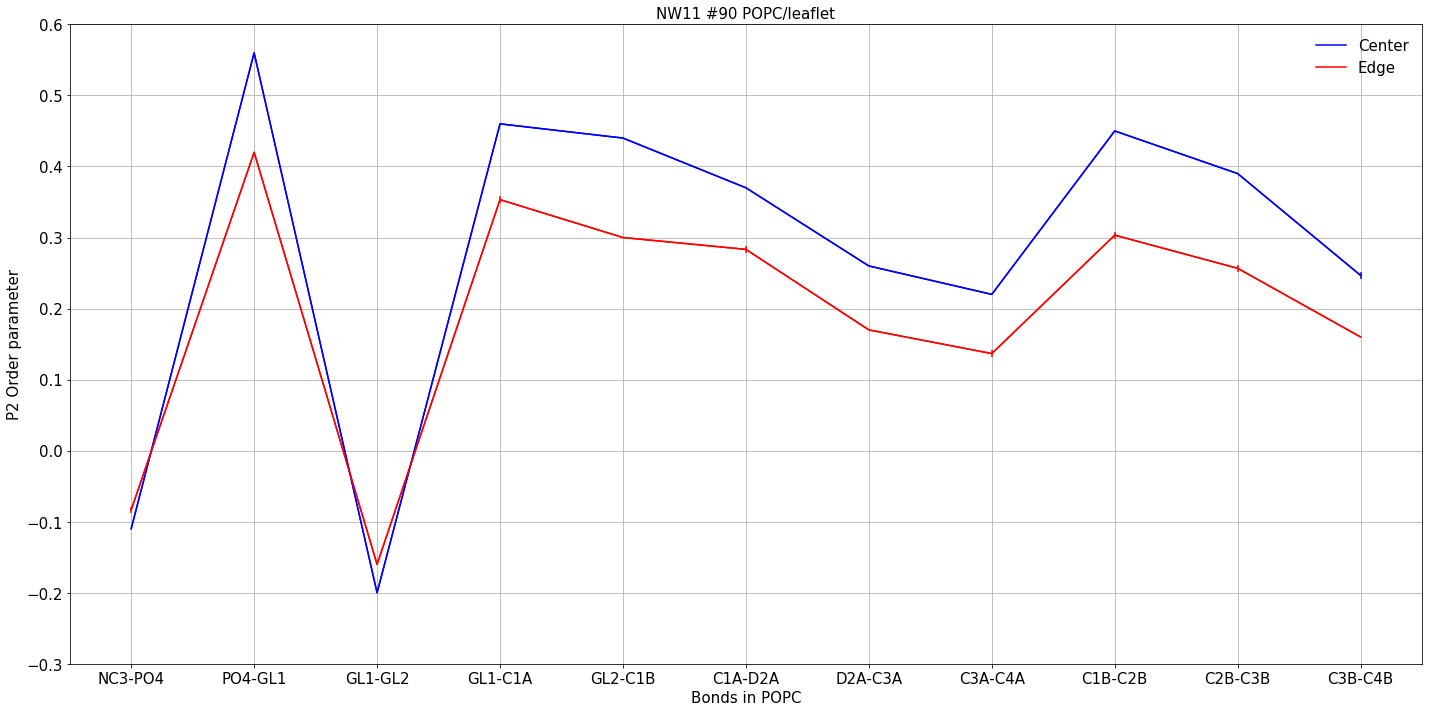

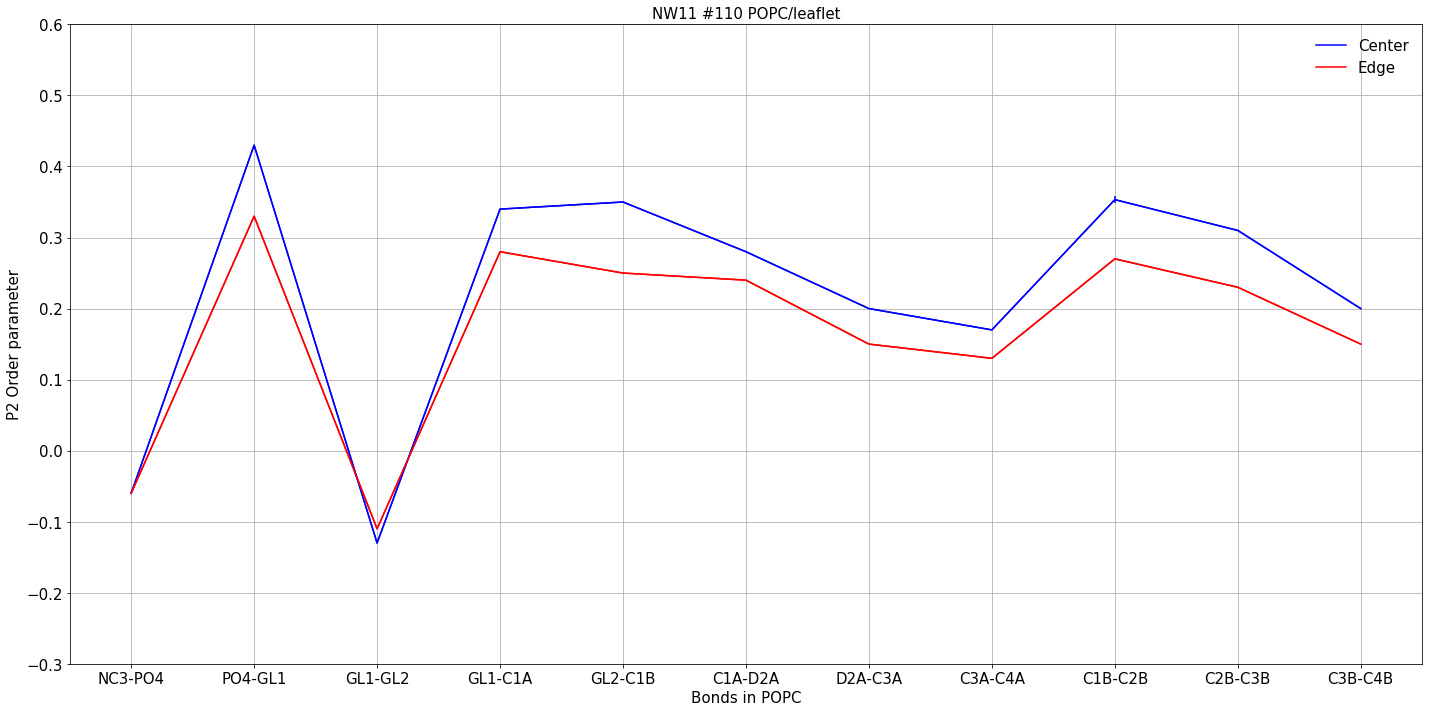

IOError: [Errno 2] No such file or directory: 'ORDER_PER_BOND/NWLA_150_v1_nowat_cut20_Averaged_order-parameter.txt'

In [9]:
#systems = ['1D1_60', '1D1_65', '1D1_70', '1D1_75', '1D1_80', '1D1_85', '1D1_90', 'NW11_70', 'NW11_80', 'NW11_90', 'NW11_99', 'NW11_110']
#systems = ['1D1_60', '1D1_70', '1D1_75', '1D1_80', '1D1_90', 'NW11_70', 'NW11_80', 'NW11_90', 'NW11_110']
systems= ['1D1_60', '1D1_70', '1D1_75', '1D1_80', '1D1_90', 'NW9_54', 'NW11_70', 'NW11_80', 'NW11_90', 'NW11_110', 'NWLA_150']

for s in systems:
    plot_order(s)

In [88]:
Data_E = []
Data_C = []
system = '1D1_60'
for r in range(1,4):
    E, C, n_beads, bonds = get_data(system, r)
    Data_E.append(E)
    Data_C.append(C)

D_E = np.array(Data_E)
D_C = np.array(Data_C)

In [98]:
mean_C = np.mean(D_C, axis=0)
std_C = np.std(D_C, axis=0)
mean_E = np.mean(D_E, axis=0)
std_E = np.std(D_E, axis=0)

In [110]:
system.split('_')[1]

'60'

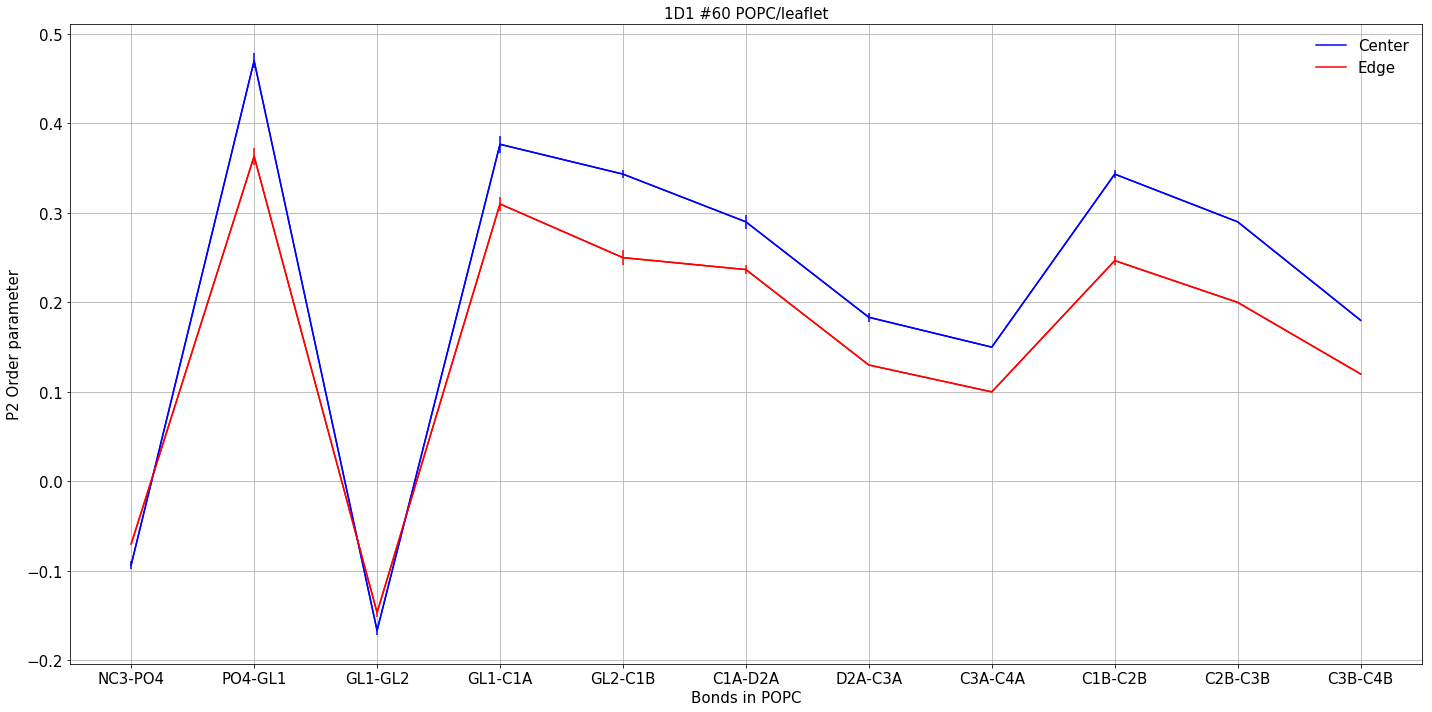

In [129]:
plt.figure(figsize=(20,10))
plt.plot(range(n_beads), mean_C, label='Center', color='blue')
plt.errorbar(range(n_beads), mean_C, yerr=std_C, color='blue')
plt.plot(range(n_beads), mean_E, label='Edge', color='red')
plt.errorbar(range(n_beads), mean_E, yerr=std_E, color='red', fmt='-')
plt.xticks(range(n_beads), bonds, fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(loc='upper right', frameon=False, fontsize=15)
plt.xlabel('Bonds in POPC', fontsize=15)
plt.ylabel('P2 Order parameter', fontsize=15)
name='{0:s} #{1:s} POPC/leaflet'.format(system.split('_')[0], system.split('_')[1])
plt.title(name, fontsize=15)
plt.tight_layout()
plt.savefig('ORDER_PER_BOND/'+system+'order_edge_cent_tail.png', dpi=600)